# Numpy

Numpy is a foundation for pandas, so let's get into it.

In [1]:
import numpy as np
np.random.seed(0)

## Elemenetwise operations

In [2]:
data = np.random.normal(size=(2,3))
data

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788]])

In [3]:
data * 30

array([[ 52.92157038,  12.00471625,  29.36213952],
       [ 67.22679598,  56.0267397 , -29.3183364 ]])

In [4]:
data + 3

array([[4.76405235, 3.40015721, 3.97873798],
       [5.2408932 , 4.86755799, 2.02272212]])

In [5]:
data.dtype

dtype('float64')

Changing to integer truncates as expected.

In [6]:
data.astype(int)

array([[1, 0, 0],
       [2, 1, 0]])

## Vectorization

Sliced objects are views. Mutations are reflected in the original array if sub_arr is changed.

In [7]:
arr = np.arange(5)
arr

array([0, 1, 2, 3, 4])

In [8]:
arr[1:3] = 11
arr

array([ 0, 11, 11,  3,  4])

In [9]:
sub_arr = arr[1:3]
sub_arr

array([11, 11])

In [10]:
sub_arr[:] = 30
arr

array([ 0, 30, 30,  3,  4])

In [11]:
sub_arr

array([30, 30])

We can copy the sub_array, instead. This won't mutate the original.

In [36]:
arr = np.arange(5)
arr

array([0, 1, 2, 3, 4])

In [13]:
copy_arr = arr[1:3].copy()
copy_arr

array([1, 2])

In [14]:
copy_arr[:] = 30
arr

array([0, 1, 2, 3, 4])

In [15]:
copy_arr

array([30, 30])

## Boolean indexing

Using boolean for indexing is very convenient with some tests.

In [20]:
orders = np.array(["Bacons", "Eggs", "Pancakes", "Bacons", "Bacons", "Pancakes", "Eggs"])
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2], [-12, -4], [3, 4]])
orders == "Bacons"

array([ True, False, False,  True,  True, False, False])

1st, 4th, and 5th items.

In [21]:
data[orders == "Bacons"]

array([[4, 7],
       [0, 0],
       [1, 2]])

Of course more can be done.

In [22]:
data[orders == "Bacons", 1:]

array([[7],
       [0],
       [2]])

In [23]:
data[orders == "Bacons", 1]

array([7, 0, 2])

`~` is used for negating boolean values.

In [24]:
orders != "Bacons"

array([False,  True,  True, False, False,  True,  True])

In [25]:
~(orders == "Bacons")

array([False,  True,  True, False, False,  True,  True])

Cannot use `and` or `or` keywords for mask. Must use `&` or `|`.

In [26]:
mask = (orders == "Bacons") | (orders == "Eggs")
mask

array([ True,  True, False,  True,  True, False,  True])

In [27]:
data[mask]

array([[4, 7],
       [0, 2],
       [0, 0],
       [1, 2],
       [3, 4]])

Boolean indexing always creates a copy when assigned. So, it's expensive.

In [28]:
data2 = data[mask]
data2

array([[4, 7],
       [0, 2],
       [0, 0],
       [1, 2],
       [3, 4]])

In [29]:
data

array([[  4,   7],
       [  0,   2],
       [ -5,   6],
       [  0,   0],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [30]:
data2[0] = [2, 0]
data2

array([[2, 0],
       [0, 2],
       [0, 0],
       [1, 2],
       [3, 4]])

In [31]:
data

array([[  4,   7],
       [  0,   2],
       [ -5,   6],
       [  0,   0],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [32]:
data == 0

array([[False, False],
       [ True, False],
       [False, False],
       [ True,  True],
       [False, False],
       [False, False],
       [False, False]])

In [33]:
data > 0

array([[ True,  True],
       [False,  True],
       [False,  True],
       [False, False],
       [ True,  True],
       [False, False],
       [ True,  True]])

In [34]:
data[data > 0]

array([4, 7, 2, 6, 1, 2, 3, 4])

## Fancy indexing

Array can be passed for indexing.

In [45]:
arr = np.arange(20).reshape(5,4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [49]:
arr[[3,1,-1]]

array([[12, 13, 14, 15],
       [ 4,  5,  6,  7],
       [16, 17, 18, 19]])

More specificity

In [50]:
arr[[3,1,-1],[0,1,0]]

array([12,  5, 16])

In [48]:
arr[[3,1,-1]][:,[1,0,3,3]]

array([[13, 12, 15, 15],
       [ 5,  4,  7,  7],
       [17, 16, 19, 19]])

**Fancy indexing, unlike slicing, always copies the data into a new array when assigning the result to a new variable.** Like boolean indexing.

Two ways of swapping axis.

In [51]:
arr.swapaxes(0,1)

array([[ 0,  4,  8, 12, 16],
       [ 1,  5,  9, 13, 17],
       [ 2,  6, 10, 14, 18],
       [ 3,  7, 11, 15, 19]])

In [52]:
arr.T

array([[ 0,  4,  8, 12, 16],
       [ 1,  5,  9, 13, 17],
       [ 2,  6, 10, 14, 18],
       [ 3,  7, 11, 15, 19]])

## Universal functions

Fancy name for element-wise transformations like `np.sqrt`

In [53]:
np.sqrt(arr)

array([[0.        , 1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974, 2.64575131],
       [2.82842712, 3.        , 3.16227766, 3.31662479],
       [3.46410162, 3.60555128, 3.74165739, 3.87298335],
       [4.        , 4.12310563, 4.24264069, 4.35889894]])

In [54]:
arr2 = np.random.normal(size=(4,3))
arr2

array([[ 0.95008842, -0.15135721, -0.10321885],
       [ 0.4105985 ,  0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323],
       [ 0.33367433,  1.49407907, -0.20515826]])

Relu np version

In [55]:
np.where(arr2<0, 0, arr2)

array([[0.95008842, 0.        , 0.        ],
       [0.4105985 , 0.14404357, 1.45427351],
       [0.76103773, 0.12167502, 0.44386323],
       [0.33367433, 1.49407907, 0.        ]])

## Vectorization

Positive numbers

In [56]:
arr2

array([[ 0.95008842, -0.15135721, -0.10321885],
       [ 0.4105985 ,  0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323],
       [ 0.33367433,  1.49407907, -0.20515826]])

In [57]:
(arr2>0).sum()

9

In [58]:
np.unique(orders)

array(['Bacons', 'Eggs', 'Pancakes'], dtype='<U8')

In [59]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [60]:
np.linalg.lstsq

<function lstsq at 0x777a5c981230>

## ..

In [61]:
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [62]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [63]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

## Random walks

In [72]:
import matplotlib.pyplot as plt

In [73]:
import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

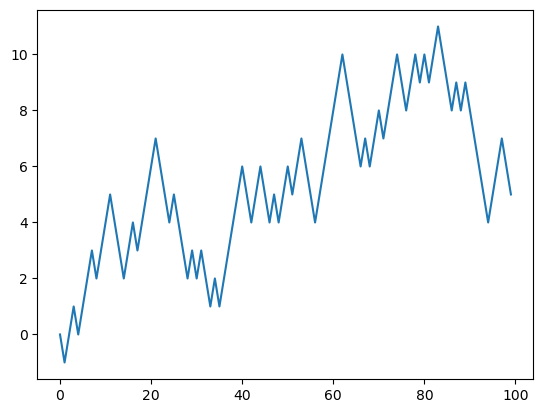

In [74]:
plt.plot(walk[:100]);

In [75]:
nsteps = 1000
rng = np.random.default_rng(seed=12345)
rng

Generator(PCG64) at 0x777A348C2C00

In [76]:
draws = rng.integers(0, 2, size=nsteps)
draws[:10]

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0])

In [77]:
steps = np.where(draws == 0, 1, -1)
steps[:10]

array([-1,  1, -1,  1,  1, -1, -1, -1, -1,  1])

In [78]:
walk = steps.cumsum()
walk[:10]

array([-1,  0, -1,  0,  1,  0, -1, -2, -3, -2])

In [79]:
walk.min(), walk.max()

(-8, 50)

In [80]:
(walk==-2).argmax()

7

Generating 5000 random walks easily

In [81]:
nwalks = 5000
nsteps = 1000
draws = rng.integers(0, 2, size=(nwalks, nsteps))
steps = np.where(draws == 0, 1, -1)
walks = steps.cumsum(axis=1)
walks.shape

(5000, 1000)

In [82]:
walks

array([[ -1,  -2,  -3, ..., -22, -23, -22],
       [ -1,   0,   1, ...,  50,  49,  48],
       [ -1,  -2,  -3, ..., -50, -49, -48],
       ...,
       [  1,   2,   1, ...,  10,   9,  10],
       [  1,   2,   3, ...,  -8,  -9,  -8],
       [  1,   0,  -1, ...,   4,   3,   2]])

In [83]:
hist30 = (np.abs(walks) >= 30).any(axis=1)
hist30

array([False,  True,  True, ...,  True, False,  True])

In [84]:
hist30.sum()

3395

In [85]:
crossing_times = walks[hist30].argmax(axis=1)
crossing_times.shape

(3395,)

In [86]:
crossing_times.mean()

471.26627393225334